# Histograms and Pixel Intensity Transformations

Histograms display the intensity of pixels on an image. Intensity Transformations (adjusting brightness, contrast, etc.) are operations on these individual pixel intensities to make objects in an image easier to see.

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [107]:
# Helper side-by-side image plotting function
def plot_side_by_side(img1, img2, title1='Original', title2='New Image', gray=False, figsize=(6,6)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    if gray:
        plt.imshow(img1, cmap='gray')
    else:
        plt.imshow(img1)
    plt.title(title1)
    plt.subplot(122)
    if gray:
        plt.imshow(img2, cmap='gray')
    else:
        plt.imshow(img2)
    plt.title(title2)
    plt.show()

In [127]:
# Helper side-by-side histogram plotting function
def plot_histogram(img1, img2, title1='Original', title2='New Image', width=5):
    intensity_vals = np.array([x for x in range(256)])
    plt.subplot(121)
    plt.bar(intensity_vals, cv2.calcHist([img1], [0], None, [256], [0,256])[:,0], width=width)
    plt.xlabel('intensity')
    plt.xlim(0, 256)
    plt.title(title1)
    plt.subplot(122)
    plt.bar(intensity_vals, cv2.calcHist([img2], [0], None, [256], [0,256])[:,0], width=width)
    plt.xlabel('intensity')
    plt.xlim(0, 256)
    plt.title(title2)
    plt.show()

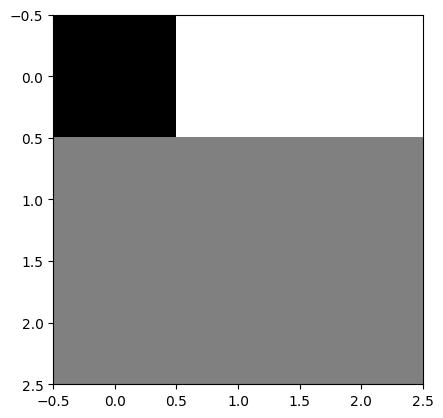

Sample image:
 [[0 2 2]
 [1 1 1]
 [1 1 1]]


In [37]:
sample_img = np.array([[0,2,2], [1,1,1], [1,1,1]], dtype=np.uint8)

plt.imshow(sample_img, cmap='gray')
plt.show()
print('Sample image:\n', sample_img)

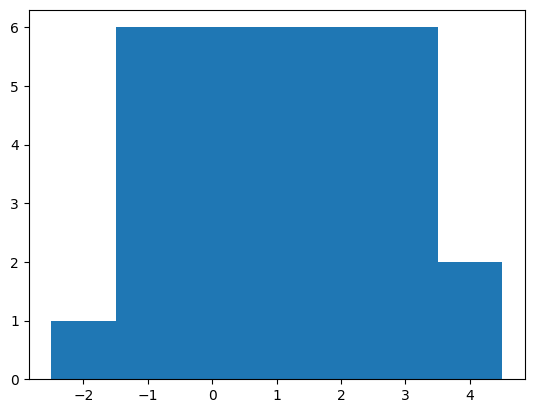

In [70]:
hist = cv2.calcHist([sample_img], [0], None, [3], [0,3])
intensity_vals = np.array([x for x in range(3)])

plt.bar(intensity_vals, hist[:,0], width=5)
plt.show()


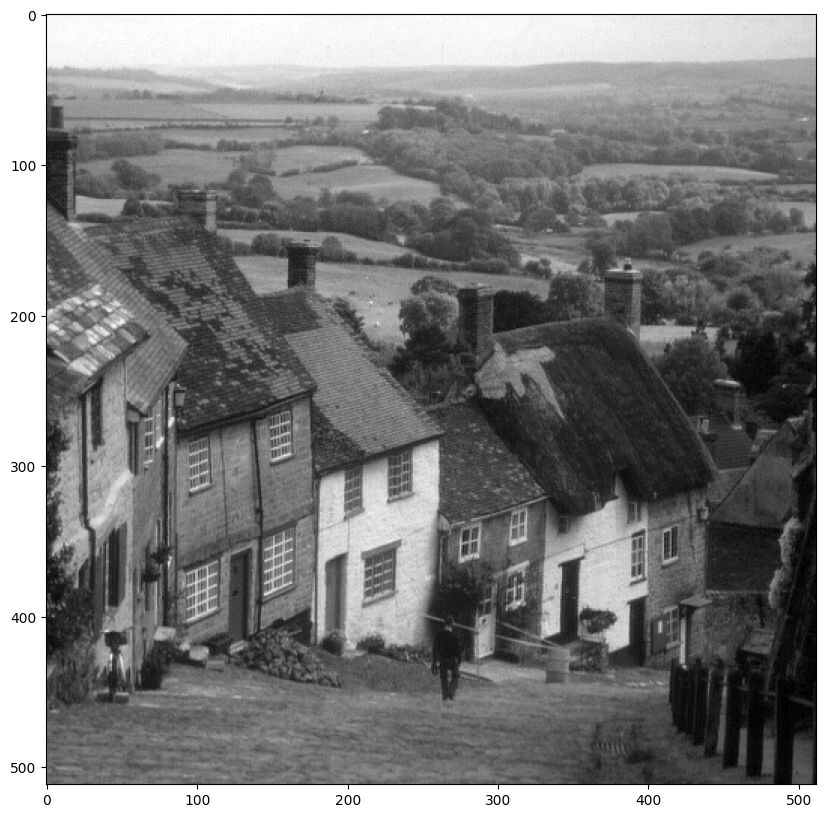

In [60]:
goldhill = cv2.imread('imgs/goldhill.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,10))
plt.imshow(goldhill, cmap='gray')
plt.show()

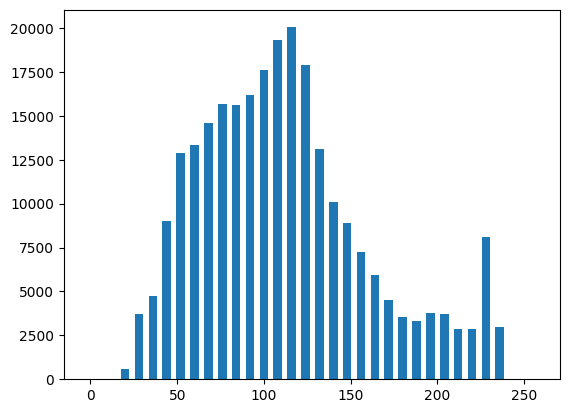

In [64]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
intensity_vals = np.array([x for x in range(hist.shape[0])])

plt.bar(intensity_vals, hist[:,0], width=5)
plt.show()

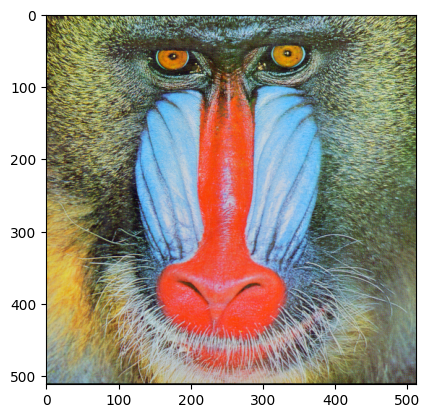

In [74]:
baboon = cv2.imread('imgs/baboon.png')

plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

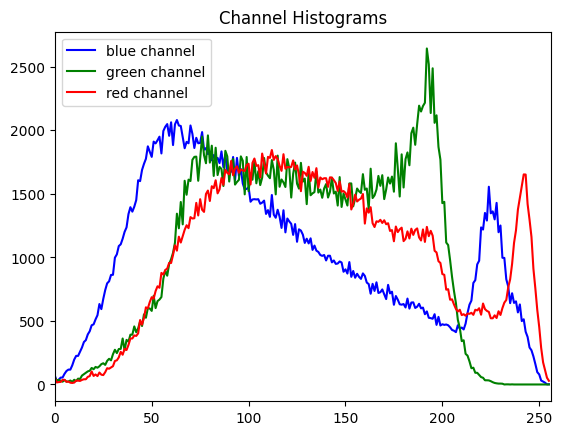

In [77]:
colours = ('blue', 'green', 'red')
intensity_vals = [x for x in range(256)]

for i,c in enumerate(colours):
    hist = cv2.calcHist([baboon], [i], None, [256], [0,256])
    
    plt.plot(intensity_vals, hist, color=c, label=c+' channel')
    plt.xlim([0, 256])

plt.legend()
plt.title('Channel Histograms')
plt.show()

### Image Negatives

It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifies to:
$$
g(x,y)=255-f(x,y) \qquad and \qquad s=255-r
$$


In [101]:
sample_img = np.array([[0,2,2], [1,1,1], [1,1,2]], dtype=np.uint8)
negative_samp_img = 255 - sample_img

print('sample image: ', sample_img)
print('negative: ', negative_samp_img)

sample image:  [[0 2 2]
 [1 1 1]
 [1 1 2]]
negative:  [[255 253 253]
 [254 254 254]
 [254 254 253]]


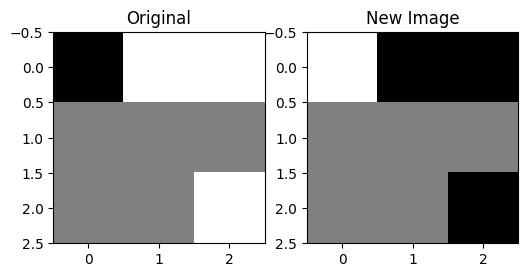

In [ ]:
plot_side_by_side(sample_img, negative_samp_img,)

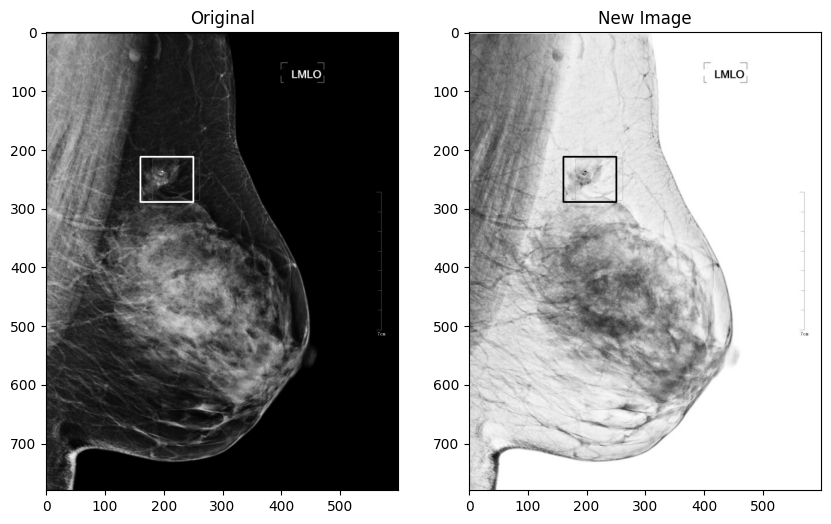

In [108]:
mammogram = cv2.imread('imgs/mammogram.png', cv2.IMREAD_GRAYSCALE)
cv2.rectangle(mammogram, pt1=(160, 212), pt2=(250,289), color=(255), thickness=2)

mammogram_neg = 255 - mammogram


plot_side_by_side(mammogram, mammogram_neg, gray=True, figsize=(10,10))


### Adjusting brightness and contrast

We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.

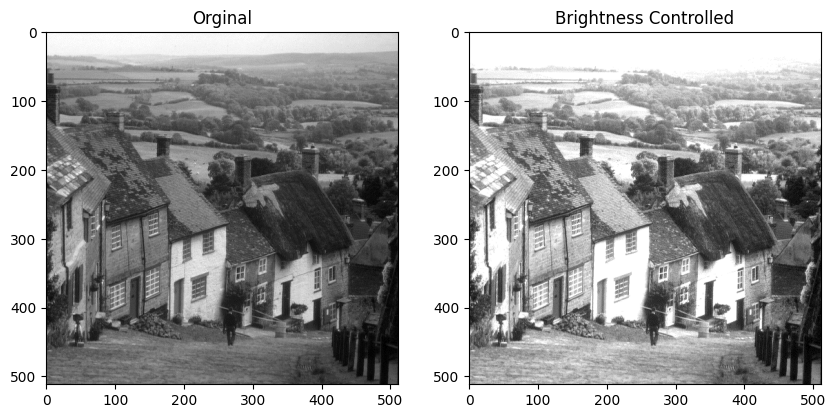

In [126]:
alpha = 1  # Contrast control
beta = 100  # Brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

plot_side_by_side(goldhill, new_image, title1='Orginal', title2='Brightness Controlled', gray=True, figsize=(10,10))

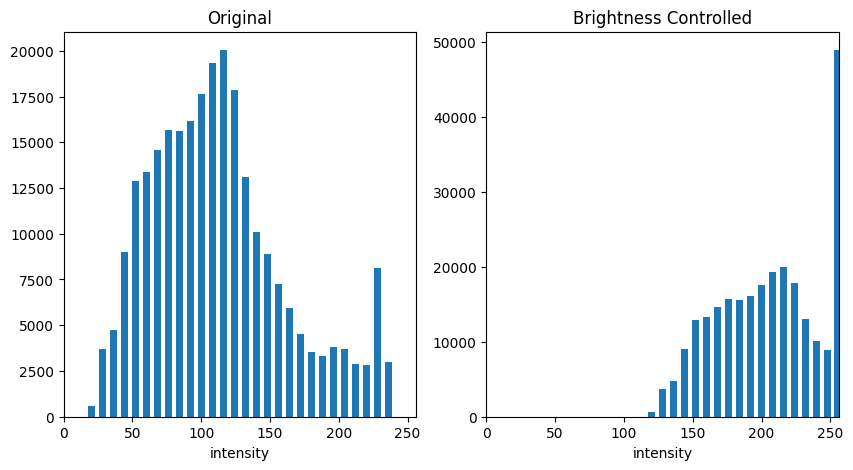

In [133]:
plt.figure(figsize=(10,5))
plot_histogram(goldhill, new_image, title1='Original', title2='Brightness Controlled', width=5)

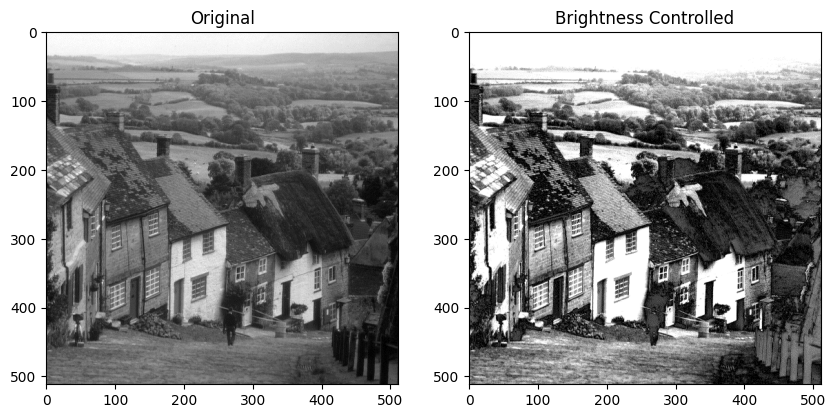

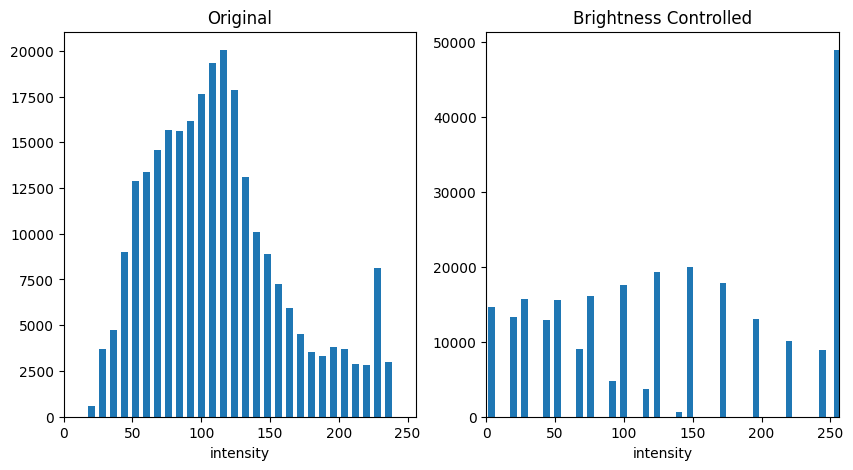

In [135]:
alpha = 3
beta = -200
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

plot_side_by_side(goldhill, new_image, title1='Original', title2='Brightness Controlled', gray=True, figsize=(10,10))
plt.figure(figsize=(10,5))
plot_histogram(goldhill, new_image, title1='Original', title2='Brightness Controlled', width=5)

### Histogram Equalization

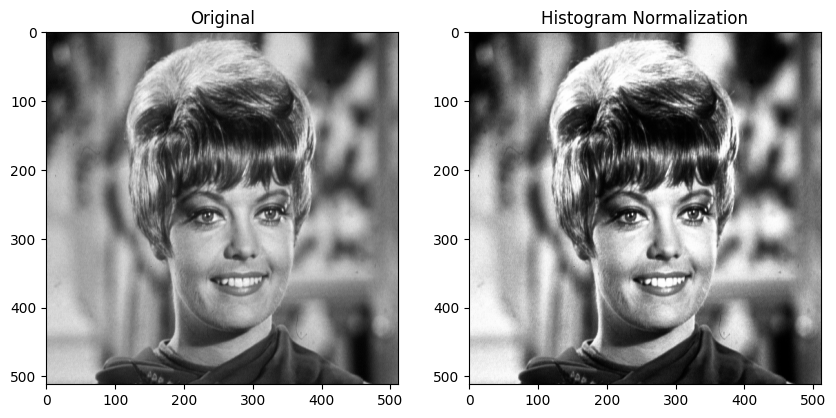

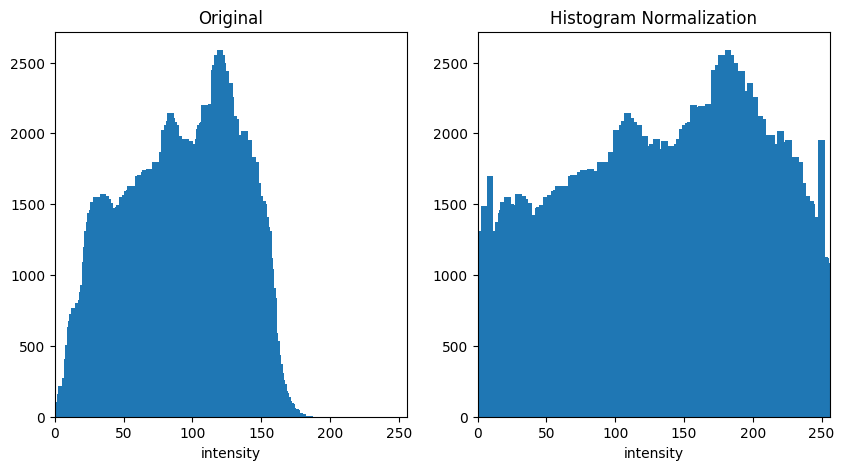

In [146]:
zelda = cv2.imread('imgs/zelda.png', cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

plot_side_by_side(zelda, new_image, title1='Original', title2='Histogram Normalization', gray=True, figsize=(10,10))
plt.figure(figsize=(10,5))
plot_histogram(zelda, new_image, title2="Histogram Normalization")

### Thresholding and Image Segmentation

Image Segmentation means extracting objects from an image. The underlying principle is thresholding - when a pixel (i,j) is greater than a threshold, then it will set that pixel to some value between a and b. Otherwise, it is set to another value, usually 0.

In [147]:
def thresholding(input_img, threshold, max_value=255, min_value=0):
    N, M = input_img.shape
    img_out = np.zeros((N, M), dtype=np.uint8)

    for i in range(N):
        for j in range(M):
            if input_img[i,j] > threshold:
                img_out[i,j] = max_value
            else:
                img_out[i,j] = min_value

    return img_out

In [149]:
# Sample
threshold = 1
max_value = 2
min_value = 0
sample_img_out = thresholding(sample_img, threshold, max_value, min_value)

sample_img_out


array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

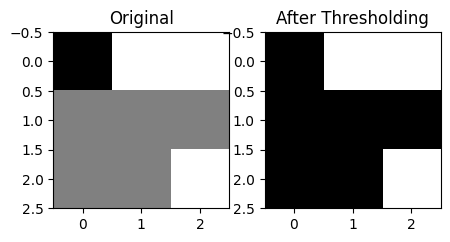

In [151]:
plot_side_by_side(sample_img, sample_img_out, title2='After Thresholding', figsize=(5,5), gray=True)

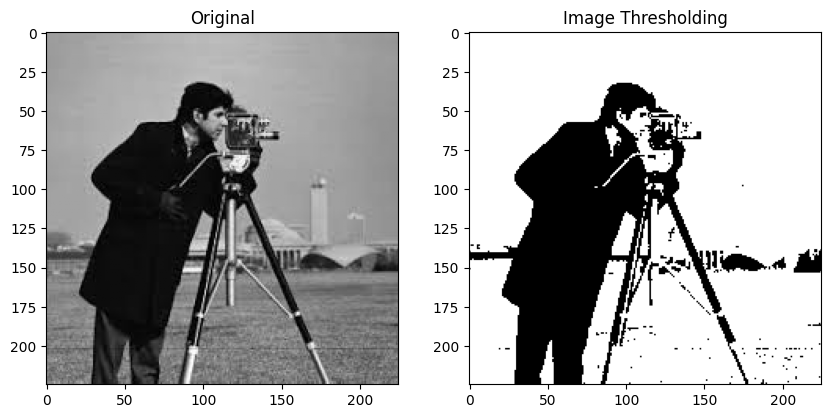

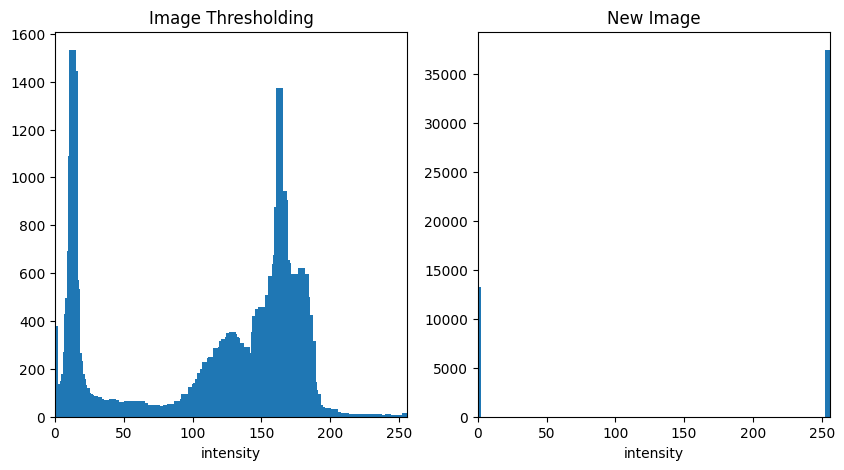

In [ ]:
cameraman = cv2.imread('imgs/cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(cameraman, threshold, max_value, min_value)

plot_side_by_side(cameraman, new_image, title2='Image Thresholding', figsize=(10,10), gray=True)
plt.figure(figsize=(10,5))
plot_histogram(cameraman, new_image, title2='Image Thresholding', width=5)

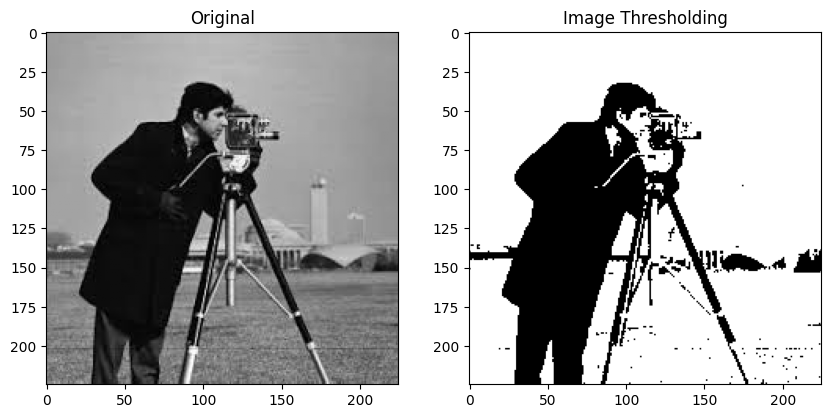

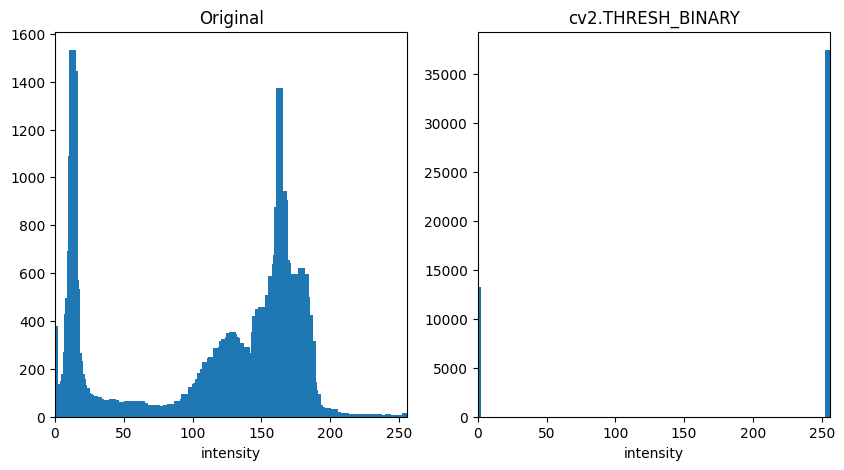

In [172]:
# Alternatively, use cv2.threshold()
_, new_image = cv2.threshold(cameraman, threshold, max_value, cv2.THRESH_BINARY)

plot_side_by_side(cameraman, new_image, title2='Image Thresholding', figsize=(10,10), gray=True)
plt.figure(figsize=(10,5))
plot_histogram(cameraman, new_image, title2='cv2.THRESH_BINARY', width=5)

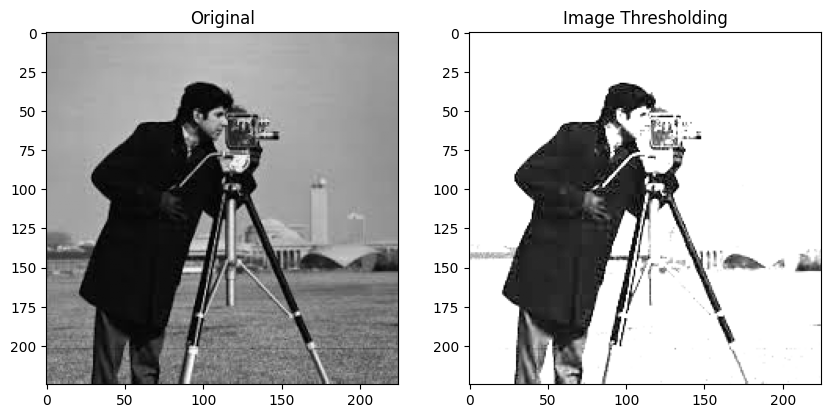

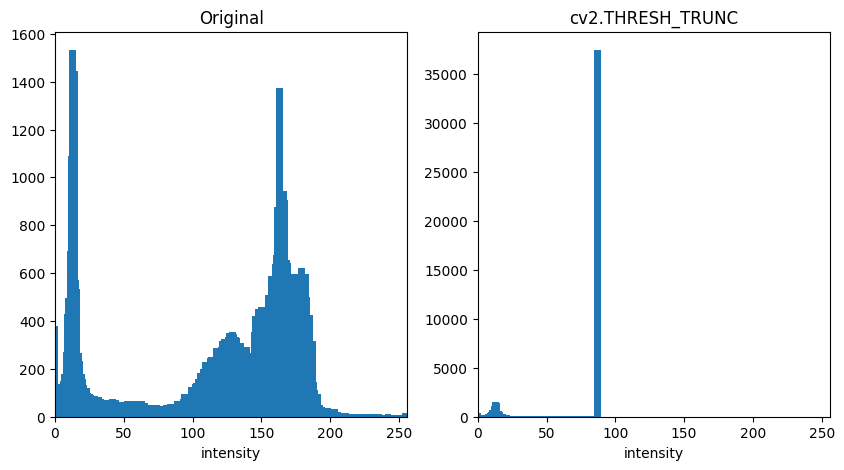

In [173]:
# cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value
_, new_image = cv2.threshold(cameraman, threshold, max_value, cv2.THRESH_TRUNC)

plot_side_by_side(cameraman, new_image, title2='Image Thresholding', figsize=(10,10), gray=True)
plt.figure(figsize=(10,5))
plot_histogram(cameraman, new_image, title2='cv2.THRESH_TRUNC', width=5)

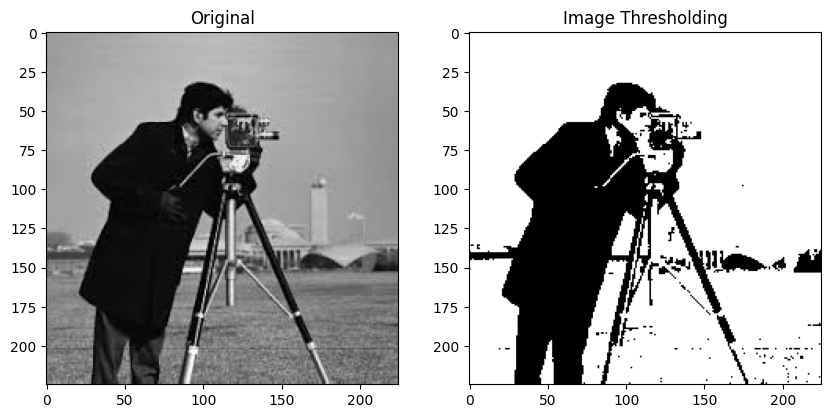

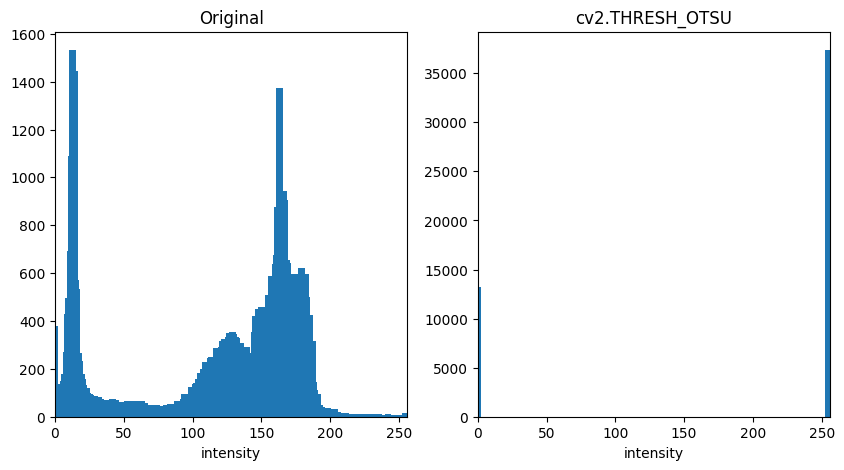

In [175]:
# cv2.THRES_OTSU determines the pixel values automatically
_, new_image = cv2.threshold(cameraman, 0, 255, cv2.THRESH_OTSU)

plot_side_by_side(cameraman, new_image, title2='Image Thresholding', figsize=(10,10), gray=True)
plt.figure(figsize=(10,5))
plot_histogram(cameraman, new_image, title2='cv2.THRESH_OTSU', width=5)